# Regresión Lineal

### 1. Generación del conjunto de datos

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

#importar y verificar si .csv existe
import os
if os.path.exists("AllData.csv"):
    df = pd.read_csv("AllData.csv")
else:
    print("Error: El archivo 'AllData.csv' no existe.")

print("Total de datos en el DataFrame:", df.shape[0])

if df.isnull().sum().sum() > 0:
    print("Advertencia: Hay valores nulos en el DataFrame.")

#Selección variable independiente y dependiente para la regresión lineal
X = df[['radiacion_solar']]
y = df['temp_aire']

#verificar si los datos se cargaron correctamente
print(df.head())

Total de datos en el DataFrame: 69
   direccion_viento  humedad_relativa  radiacion_solar  temp_aire  vel_viento  \
0             206.5              60.0             31.0       18.6        10.2   
1             194.1              55.0             30.3       20.3        10.2   
2             186.4              47.2             25.1       20.0         9.0   
3             170.5              54.8             15.8       16.0         9.2   
4             156.8              47.3             10.6       14.7         8.5   

   mp10_val  
0   22.5369  
1   39.0410  
2   43.8277  
3   34.0361  
4   32.6348  


### 2. Visualización del conjunto de datos

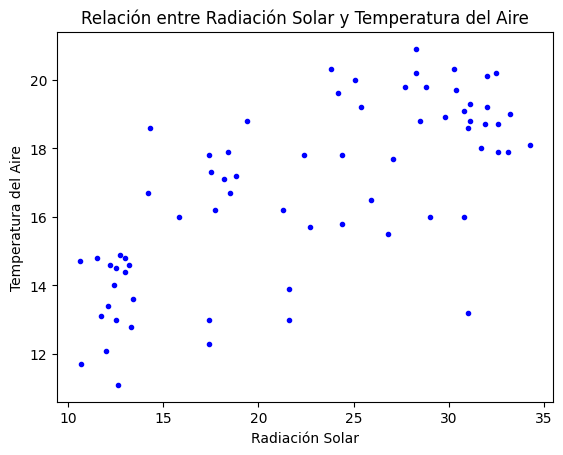

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Relación entre Radiación Solar y Temperatura del Aire")
plt.plot(X, y, "b.")
plt.xlabel("Radiación Solar")
plt.ylabel("Temperatura del Aire")
plt.show()

### 3. Modificación del conjunto de datos

In [29]:
#Reorganización del DataFrame
df = pd.concat([X, y], axis=1)
df.columns = ['radiacion_solar', 'temp_aire']
df.head()

,radiacion_solar,temp_aire
0,31.0,18.6
1,30.3,20.3
2,25.1,20.0
3,15.8,16.0
4,10.6,14.7


### 4. Construcción del modelo

In [30]:
from sklearn.linear_model import LinearRegression

#Entrenamiento del Modelo: Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [31]:
#Valores para la ecuación de la recta de regresión

# Obtiene el valor del interceptor que representa el valor de temp_aire cuando radiacion_solar es 0.
# Parámetro theta 0 
lin_reg.intercept_

#Obtiene la pendiente que indica cuánto cambia temp_aire por cada unidad de radiacion_solar.
# Parámetro theta 1
lin_reg.coef_

array([0.23907246])

In [33]:
#X_min_max almacena el valor mínimo y máximo de radiacion_solar.
#lin_reg.predict(X_min_max): Calcula las predicciones para estos valores.

X_min_max = pd.DataFrame({"radiacion_solar": [df["radiacion_solar"].min(), df["radiacion_solar"].max()]})
y_train_pred = lin_reg.predict(X_min_max)


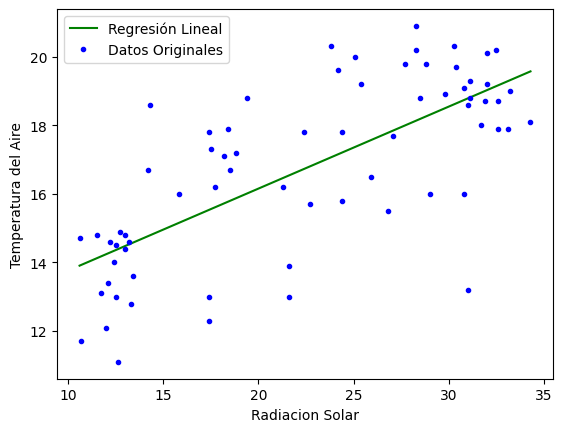

In [34]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['radiacion_solar'], df['temp_aire'], "b.")

plt.xlabel("Radiacion Solar")
plt.ylabel("Temperatura del Aire")
plt.legend(["Regresión Lineal", "Datos Originales"])
plt.show()

### 5. Predicción de nuevos ejemplos

In [36]:
# Crea un nuevo dato con radiacion_solar = 100
x_new = pd.DataFrame({"radiacion_solar": [100]})
prediccion = lin_reg.predict(x_new)

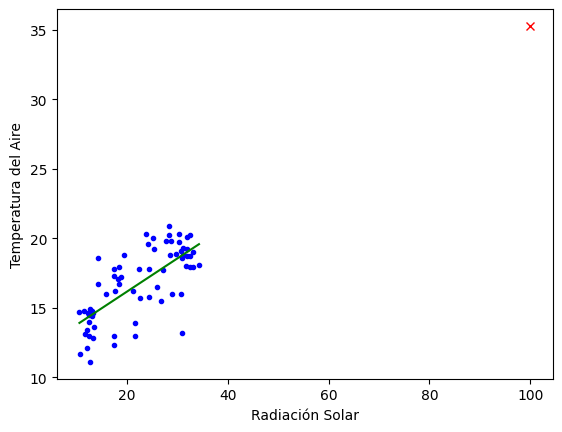

In [37]:
plt.plot(df['radiacion_solar'], df['temp_aire'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, prediccion, "rx")
plt.xlabel("Radiación Solar")
plt.ylabel("Temperatura del Aire")
plt.show()

### Evaluación del modelo

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_real = df['temp_aire']
y_pred = lin_reg.predict(df[['radiacion_solar']])

mae = mean_absolute_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
r2 = r2_score(y_real, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 1.43
RMSE: 1.80
R²: 0.51


### Análisis de residuos

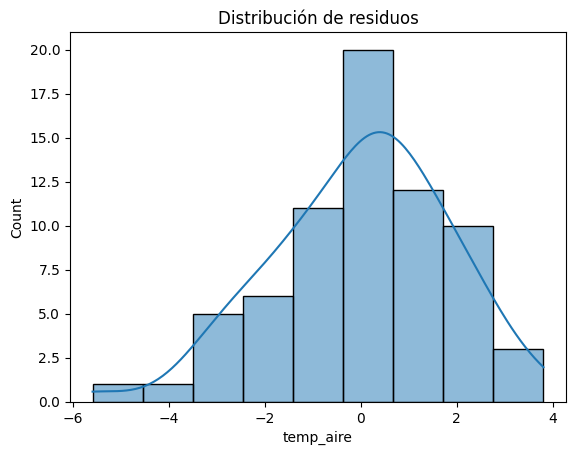

In [41]:
residuos = y_real - y_pred
sns.histplot(residuos, kde=True)
plt.title("Distribución de residuos")
plt.show()

### Curva de dispersión real vs predicho

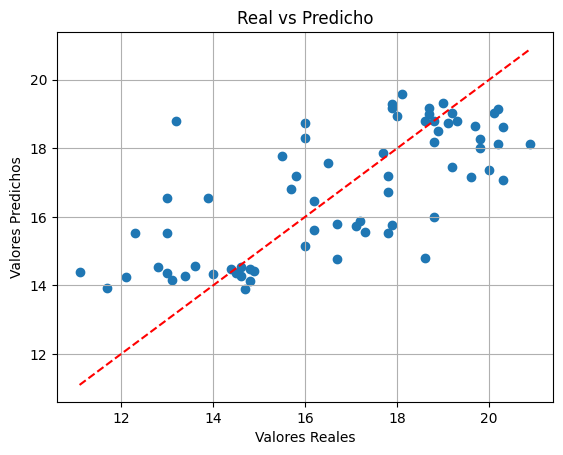

In [42]:
plt.scatter(y_real, y_pred)
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Real vs Predicho")
plt.grid(True)
plt.show()